In [1]:
import tensorflow as tf
import tensorflow.keras as K

## Image Augmentation using ImageDataGenerator on handwritten-digit Dataset in Keras

### 1. Load data from Keras

In [2]:
(x_train,y_train),(x_test,y_test) = K.datasets.mnist.load_data()

In [3]:
import matplotlib.pyplot as plt

### 2. Visualize handwritten digit Data

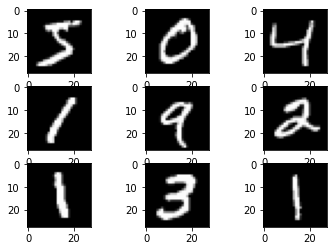

In [4]:
for i in range(0,9):
    plt.subplot(330+1+i)
    plt.imshow(x_train[i],cmap=plt.get_cmap('gray'))
plt.show()

### 3. Feature Standardization

In [5]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test  = x_test.reshape(x_test.shape[0],28,28,1)
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')

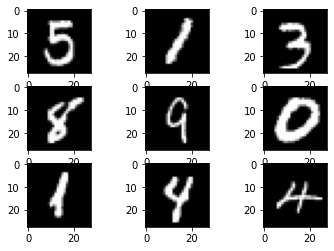

In [6]:
datagen = K.preprocessing.image.ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True)
datagen.fit(x_train)

for x_batch,y_batch in datagen.flow(x_train,y_train,batch_size=9):
    for i in range(0,9):
        plt.subplot(330+1+i)
        plt.imshow(x_batch[i].reshape(28,28),cmap=plt.get_cmap('gray'))
    plt.show()
    break

### 4. ZCA Whitening

Image whitening is performed using principal component analysis technique i.e. reduces the redundancy in the matrix of pixel images.

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:336: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


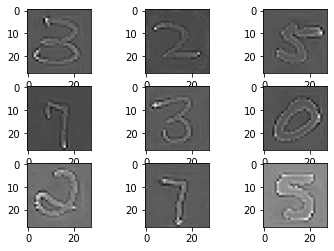

In [7]:
datagen = K.preprocessing.image.ImageDataGenerator(zca_whitening=True)
datagen.fit(x_train)

for x_batch,y_batch in datagen.flow(x_train,y_train,batch_size=9):
    for i in range(0,9):
        plt.subplot(330+1+i)
        plt.imshow(x_batch[i].reshape(28,28),cmap=plt.get_cmap('gray'))
    plt.show()
    break

### 5. Rotation of Images

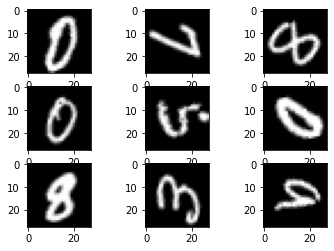

In [8]:
datagen = K.preprocessing.image.ImageDataGenerator(rotation_range=90)
datagen.fit(x_train)

for x_batch,y_batch in datagen.flow(x_train,y_train,batch_size=9):
    for i in range(0,9):
        plt.subplot(330+1+i)
        plt.imshow(x_batch[i].reshape(28,28),cmap=plt.get_cmap('gray'))
    plt.show()
    break

### 6. Shifting of Images in the frame

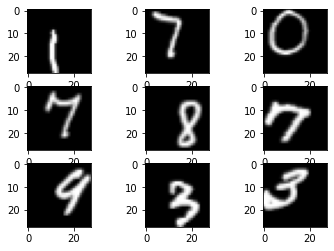

In [9]:
shift = 0.2
datagen = K.preprocessing.image.ImageDataGenerator(width_shift_range=shift, height_shift_range=shift)
datagen.fit(x_train)

for x_batch,y_batch in datagen.flow(x_train,y_train,batch_size=9):
    for i in range(0,9):
        plt.subplot(330+1+i)
        plt.imshow(x_batch[i].reshape(28,28),cmap=plt.get_cmap('gray'))
    plt.show()
    break

### 7. Flipping Images

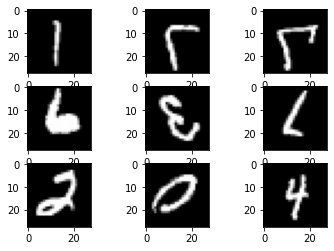

In [10]:
datagen = K.preprocessing.image.ImageDataGenerator(vertical_flip=True, horizontal_flip=True)

datagen.fit(x_train)

for x_batch,y_batch in datagen.flow(x_train,y_train,batch_size=9):
    for i in range(0,9):
        plt.subplot(330+1+i)
        plt.imshow(x_batch[i].reshape(28,28),cmap=plt.get_cmap('gray'))
    plt.show()
    break

### 8. Save Augmented Images

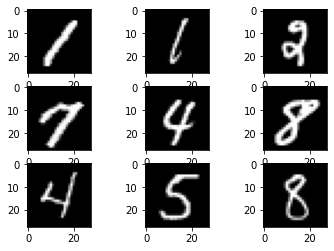

In [12]:
import os
datagen = K.preprocessing.image.ImageDataGenerator()
datagen.fit(x_train)

os.makedirs('images')
for x_batch,y_batch in datagen.flow(x_train,y_train,batch_size=9,save_to_dir='images',save_prefix='aug',save_format='png'):
    for i in range(0,9):
        plt.subplot(330+1+i)
        plt.imshow(x_batch[i].reshape(28,28),cmap=plt.get_cmap('gray'))
    plt.show()
    break